In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load netflix_titles.csv into a DataFrame and inspect
df = pd.read_csv('netflix_titles.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.isna().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.groupby('type')['title'].count()

type
Movie      6131
TV Show    2676
Name: title, dtype: int64

In [12]:
df[df['type'] == 'Movie'].isna().sum()


show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [ ]:

df[df['type'] == 'TV Show'].isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [28]:
#grouping movies and tv shows into separate dataframes
df_movies = df[df['type'] == 'Movie']
df_tvshows = df[df['type'] == 'TV Show']

In [ ]:
# Filling missing director values in TV Shows with 'No Director'
df_tvshows['director'].fillna('No Director', inplace=True)
# Filling missing values in cast, country, and rating columns with 'unknown'
df_tvshows['cast'].fillna('unknown', inplace=True)
df_tvshows['country'].fillna('unknown', inplace=True)
df_tvshows['rating'].fillna('unknown', inplace=True)
df_tvshows['date_added'].fillna('unknown', inplace=True)


In [20]:
df_tvshows.shape[0]

2676

In [ ]:
#fill missing director values in movies with 'No Director'
df_movies['director'].fillna('No Director', inplace=True)
# Filling missing values in cast, country, and rating columns with 'unknown'
df_movies['cast'].fillna('unknown', inplace=True)
df_movies['country'].fillna('unknown', inplace=True)
df_movies['rating'].fillna('unknown', inplace=True)

df_movies.shape[0]



In [37]:
#movies and tv shows dataframes after handling missing values
df_movies.isna().sum()
df_tvshows.isna().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Number of Movies:  6131
Number of TV Shows:  2676


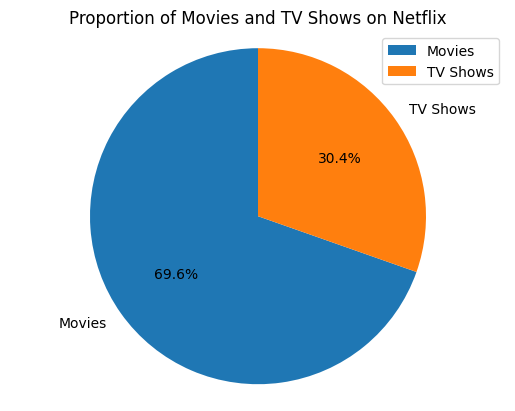

In [39]:
#visualizations
print("Number of Movies: ", df_movies.shape[0])
print("Number of TV Shows: ", df_tvshows.shape[0])
labels = ['Movies', 'TV Shows']
sizes = [df_movies.shape[0], df_tvshows.shape[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Movies and TV Shows on Netflix')
legend = ax1.legend(loc="best")

plt.show()


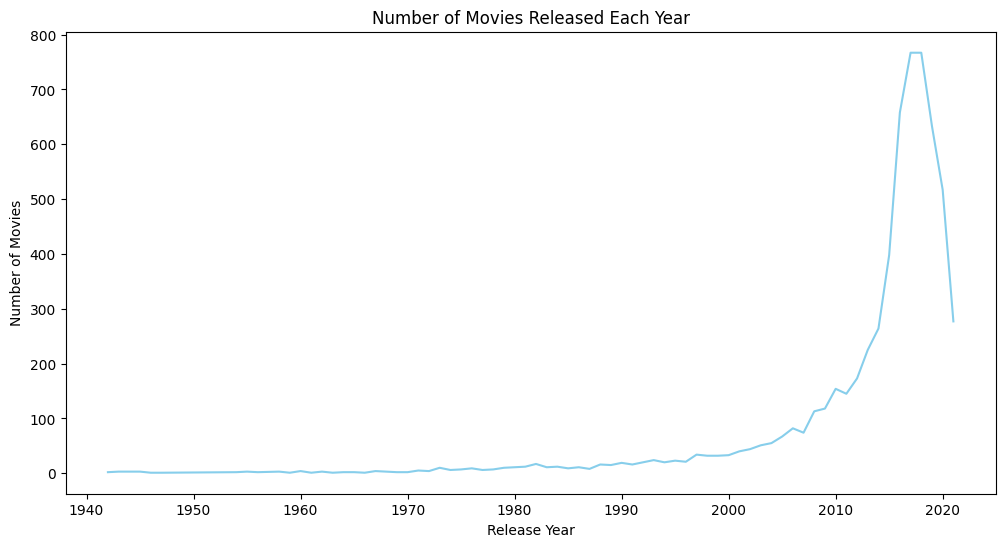

In [ ]:
#movie release trend analysis
df_movies['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6), color='skyblue')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

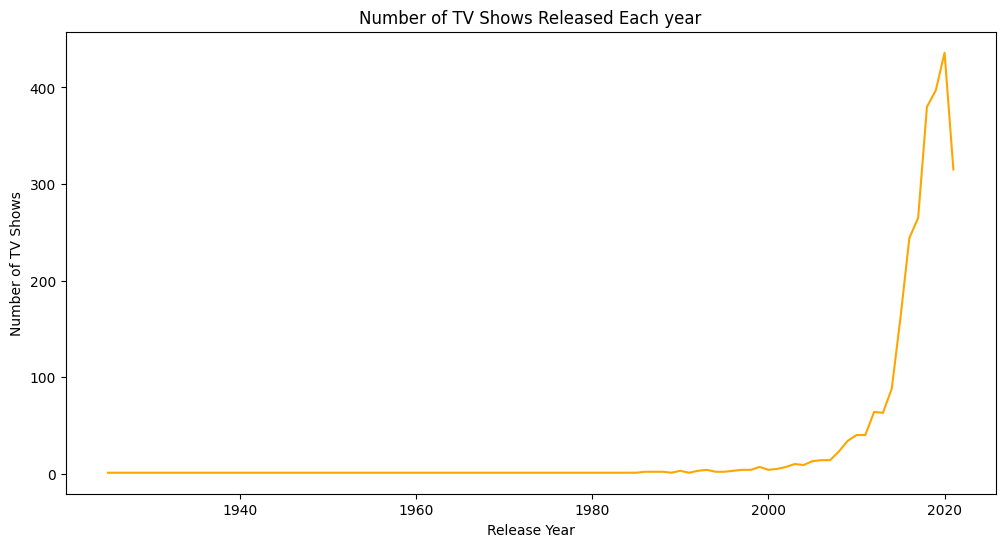

In [44]:
# tv show release trend analysis
df_tvshows['release_year'].value_counts().sort_index().plot(kind='line',figsize=(12,6), color='orange')
plt.title('Number of TV Shows Released Each year')
plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows')
plt.show()

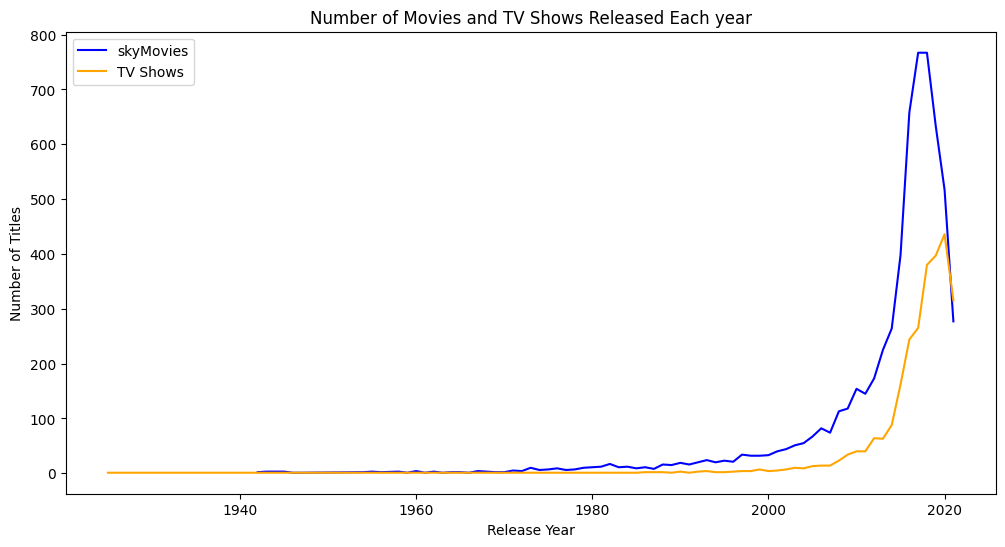

In [ ]:
#combined release trend analysis
df_movies['release_year'].value_counts().sort_index().plot(kind='line',figsize=(12,6), color='skyBlue', label='Movies')
df_tvshows['release_year'].value_counts().sort_index().plot(kind='line',figsize=(12,6), color='Orange', label='TV Shows')
plt.title('Number of Movies and TV Shows Released Each year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()